In [31]:
## LUIZ HENRIQUE MARCUCCI
## JOÃO VICTOR MORAES DE SOUZA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:

file_path = "/content/world_happiness_report.csv"
df = pd.read_csv(file_path, delimiter=";")

In [22]:
df.shape

(4000, 24)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    4000 non-null   object 
 1   Year                       4000 non-null   int64  
 2   Happiness_Score            4000 non-null   float64
 3   GDP_per_Capita             4000 non-null   float64
 4   Social_Support             4000 non-null   float64
 5   Healthy_Life_Expectancy    4000 non-null   float64
 6   Freedom                    4000 non-null   float64
 7   Generosity                 4000 non-null   float64
 8   Corruption_Perception      4000 non-null   float64
 9   Unemployment_Rate          4000 non-null   float64
 10  Education_Index            4000 non-null   float64
 11  Population                 4000 non-null   int64  
 12  Urbanization_Rate          4000 non-null   float64
 13  Life_Satisfaction          4000 non-null   float

In [16]:
print(df.head())

  Country  Year  Happiness_Score  GDP_per_Capita  Social_Support  \
0   China  2022             4.39        44984.68            0.53   
1      UK  2015             5.49        30814.59            0.93   
2  Brazil  2009             4.65        39214.84            0.03   
3  France  2019             5.20        30655.75            0.77   
4   China  2022             7.28        30016.87            0.05   

   Healthy_Life_Expectancy  Freedom  Generosity  Corruption_Perception  \
0                    71.11     0.41       -0.05                   0.83   
1                    63.14     0.89        0.04                   0.84   
2                    62.36     0.01        0.16                   0.59   
3                    78.94     0.98        0.25                   0.63   
4                    50.33     0.62        0.18                   0.92   

   Unemployment_Rate  ...  Public_Trust  Mental_Health_Index  \
0              14.98  ...          0.34                76.44   
1              19.

In [17]:
#ESTATISTICAS DESCRITIVAS
descriptive_stats = df.describe()
print(descriptive_stats)

              Year  Happiness_Score  GDP_per_Capita  Social_Support  \
count  4000.000000      4000.000000     4000.000000     4000.000000   
mean   2014.670750         5.455005    30482.009953        0.505860   
std       5.724075         1.427370    17216.122032        0.286202   
min    2005.000000         3.000000     1009.310000        0.000000   
25%    2010.000000         4.237500    15425.125000        0.260000   
50%    2015.000000         5.430000    29991.255000        0.510000   
75%    2020.000000         6.662500    45763.085000        0.750000   
max    2024.000000         8.000000    59980.720000        1.000000   

       Healthy_Life_Expectancy      Freedom   Generosity  \
count              4000.000000  4000.000000  4000.000000   
mean                 67.917605     0.502723     0.143960   
std                  10.172091     0.285219     0.200088   
min                  50.000000     0.000000    -0.200000   
25%                  59.177500     0.260000    -0.030000   


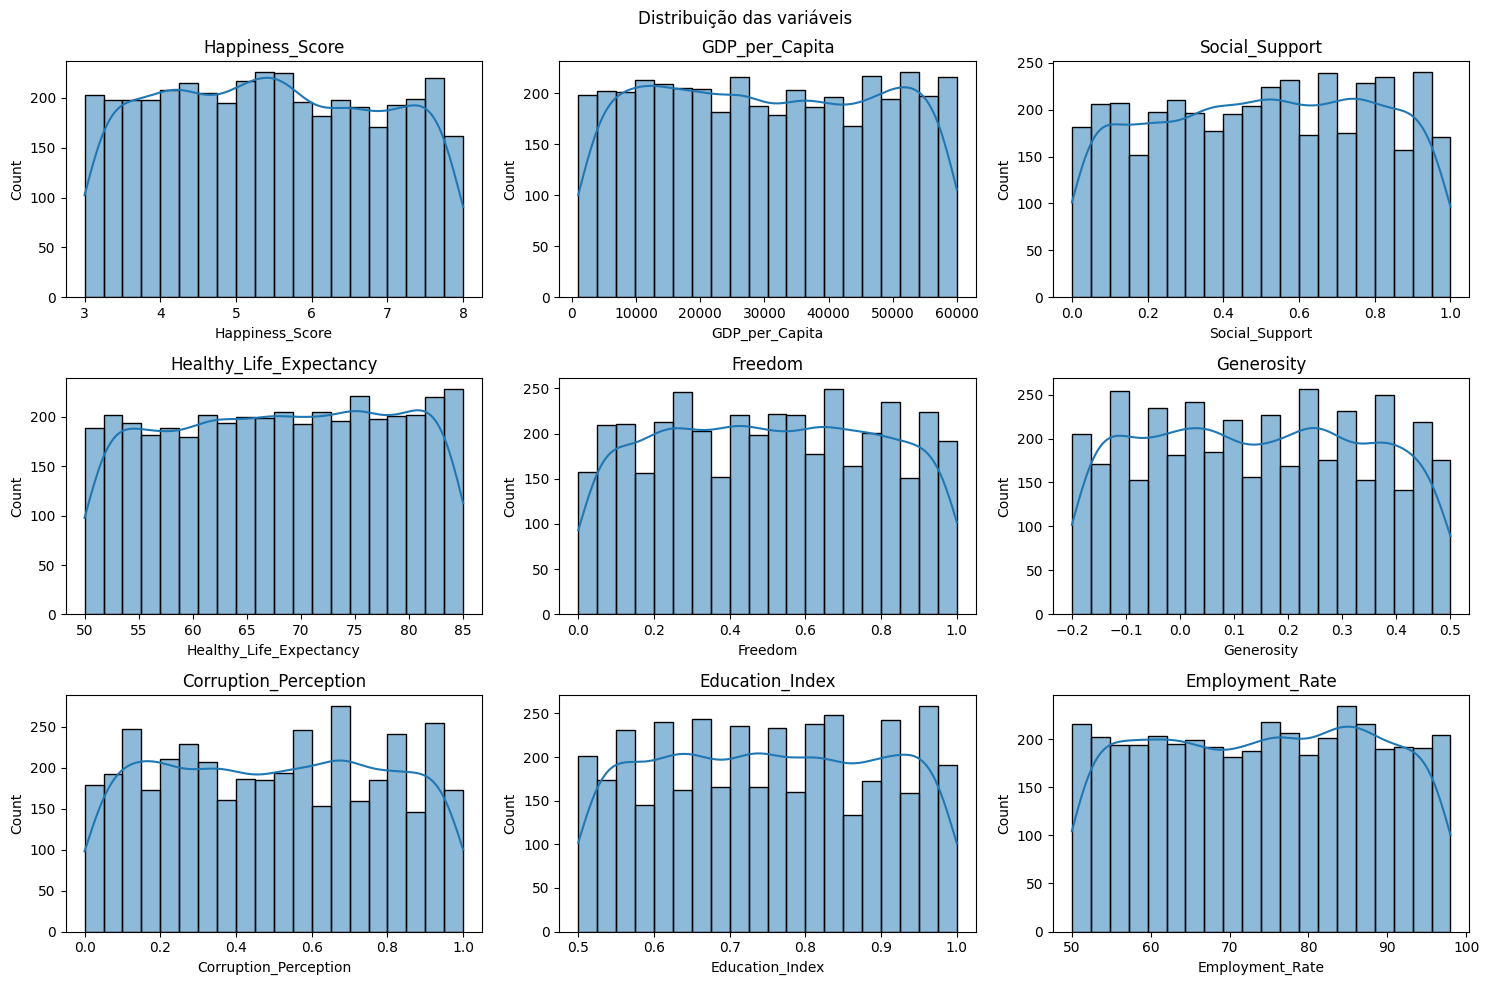

In [13]:
# Histograma das principais variáveis
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Distribuição das variáveis")

cols = ["Happiness_Score", "GDP_per_Capita", "Social_Support", "Healthy_Life_Expectancy",
        "Freedom", "Generosity", "Corruption_Perception", "Education_Index", "Employment_Rate"]

for ax, col in zip(axes.flatten(), cols):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

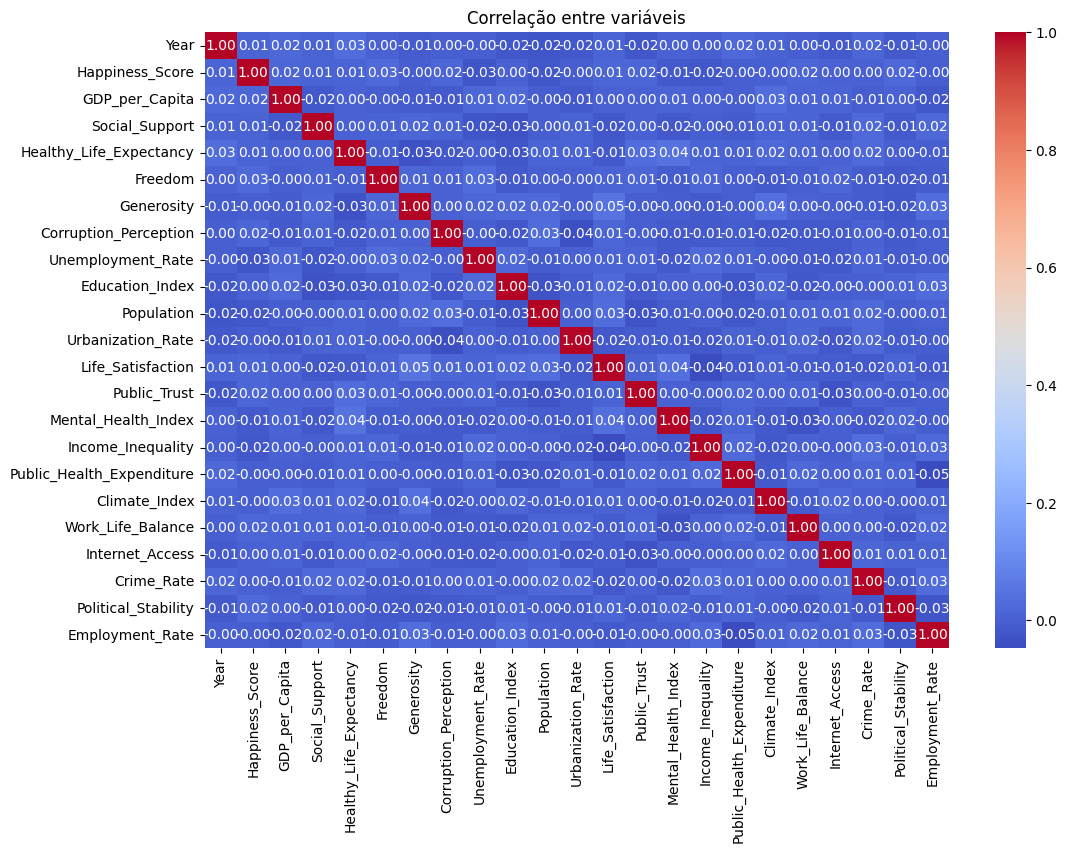

In [21]:
#MATRIZ DE CORRELAÇÃO
df_sem_pais = df.drop(columns=['Country'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_sem_pais.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlação entre variáveis")
plt.show()

In [30]:
#Classificacao dos niveis de felicidade
bins = [0, 2, 4, 6, 8, 10]
labels = ['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta']

df['Happiness_Category'] = pd.cut(df['Happiness_Score'], bins=bins, labels=labels)


print(df['Happiness_Category'].value_counts())

Happiness_Category
Média          1682
Alta           1508
Baixa           810
Muito Baixa       0
Muito Alta        0
Name: count, dtype: int64
